# This week

- **no lab assignments**.  Labtime spent on going over past assignments and problem sets as you need (i.e., one question from a while back was: can we go over previous assignments to find efficient ways to do things, that will be our agenda).

- one problem set, which is also the final, due Saturday at midnight (to be released later today)

# Unsupervised learning

General formulation: we have complicated data, and we would like the computer to come up with a *simpler* representation of the data while retaining all the important information.

The most common varieties are dimensionality reduction and clustering.

Tradeoff: simpler representation vs more information retained.

# Dimensionality reduction

Goal: find a low dimensional numeric representation of some originally high-dimensional, numeric data.

We will talk about PCA in particular, although there are many different models for dimensionality reduction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Principal Component Analysis

Goal: find orthogonal directions in original feature space, in order of how much variance they can capture.

In [2]:
from sklearn.decomposition import PCA

In [175]:
bf = pd.read_csv('bodyfat.csv')
bf = bf[['height', 'weight']]

In [176]:
bf = bf[bf['height']>30]
bf

,height,weight
0,67.75,154.25
1,72.25,173.25
2,66.25,154.00
3,72.25,184.75
4,71.25,184.25
...,...,...
247,67.00,134.25
248,69.75,201.00
249,66.00,186.75
250,70.50,190.75


Text(0, 0.5, 'weight')

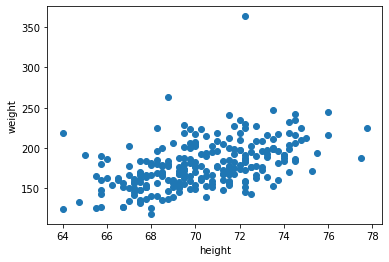

In [177]:
plt.scatter(bf['height'], bf['weight'])
plt.xlabel('height')
plt.ylabel('weight')


In [179]:
pca = PCA()
pca.fit(bf)

PCA()

In [181]:
[f for f in dir(pca) if f[0].isalpha()]

['components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'score_samples',
 'set_params',
 'singular_values_',
 'svd_solver',
 'tol',
 'transform',
 'whiten']

In [183]:
pca.n_components_

2

In [187]:
pca.components_

array([[ 0.04368801,  0.99904522],
       [-0.99904522,  0.04368801]])

In [188]:
pca.explained_variance_

array([866.09017544,   5.19139572])

In [189]:
pca.explained_variance_ratio_

array([0.99404166, 0.00595834])

In [190]:
bf.var()

height      6.834544
weight    864.447027
dtype: float64

### Scaling

How do we compare variance across features?  Why do we assume lbs^2 are the same units as inches^2?  that doesnt make sense.

$z_i = (x_i - \bar x)/s_x$

In [197]:
bf.mean()

height      7.031076e+01
weight      1.788205e+02
height_z    2.164493e-15
weight_z   -8.169649e-16
dtype: float64

In [191]:
m = bf.mean()
s = bf.std()

In [194]:
for c in ['height', 'weight']:
    newc = c + '_z'
    bf[newc] = (bf[c]-m[c])/s[c]
    

In [195]:
bf

,height,weight,height_z,weight_z
0,67.75,154.25,-0.979521,-0.835690
1,72.25,173.25,0.741784,-0.189464
2,66.25,154.00,-1.553289,-0.844193
3,72.25,184.75,0.741784,0.201673
4,71.25,184.25,0.359272,0.184667
...,...,...,...,...
247,67.00,134.25,-1.266405,-1.515928
248,69.75,201.00,-0.214496,0.754366
249,66.00,186.75,-1.648917,0.269697
250,70.50,190.75,0.072388,0.405744


Text(0, 0.5, 'weight (z-score)')

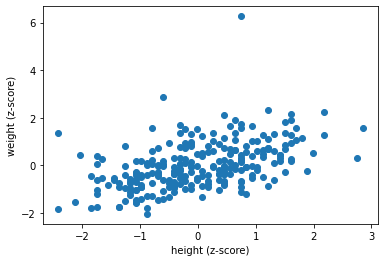

In [199]:
plt.scatter(bf['height_z'], bf['weight_z'])

plt.xlabel('height (z-score)')
plt.ylabel('weight (z-score)')

In [200]:
bf.var()

height        6.834544
weight      864.447027
height_z      1.000000
weight_z      1.000000
dtype: float64

In [201]:
features = ['height_z', 'weight_z']
pca = PCA()
pca.fit(bf[features])

PCA()

In [203]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [205]:
pca.explained_variance_ratio_

array([0.74442498, 0.25557502])

(-2.676918315518091,
 3.1085779421300144,
 -2.4676655012072577,
 6.6854451524913845)

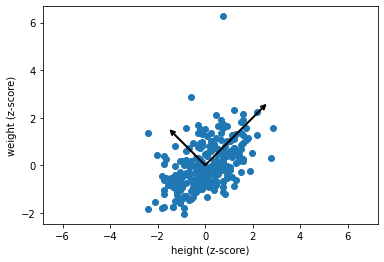

In [207]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(bf['height_z'], bf['weight_z'])

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.xlabel('height (z-score)')
plt.ylabel('weight (z-score)')

plt.axis('equal')

In [213]:
pca.transform(bf[features].iloc[0:3,:])

array([[-1.28354764,  0.10170375],
       [ 0.39054933, -0.65849169],
       [-1.69527556,  0.50140664]])

In [240]:
bf.iloc[0:3,:]

,height,weight,height_z,weight_z
0,67.75,154.25,-0.979521,-0.835690
1,72.25,173.25,0.741784,-0.189464
2,66.25,154.00,-1.553289,-0.844193


Text(0, 0.5, 'position on second PC')

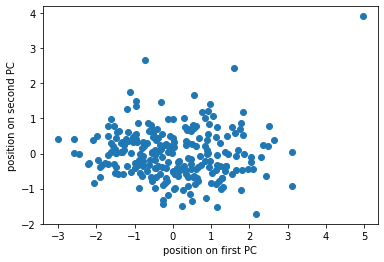

In [241]:
pca_locations = pca.transform(bf[features])
plt.scatter(pca_locations[:,0], pca_locations[:,1])
plt.xlabel('position on first PC')
plt.ylabel('position on second PC')

### null simulation for p values

In [236]:
null_variance_explained = []
for sim in range(100):
    height = np.random.random(100)
    weight = np.random.random(100)
    fake_bf = pd.DataFrame({'h':height, 'w':weight})
    fake_pca = PCA()
    fake_pca.fit(fake_bf)
    null_variance_explained.append(fake_pca.explained_variance_ratio_[0])

(array([ 7., 22., 12., 20., 15., 13.,  4.,  3.,  1.,  3.]),
 array([0.50465342, 0.51662567, 0.52859792, 0.54057017, 0.55254242,
        0.56451467, 0.57648692, 0.58845917, 0.60043142, 0.61240367,
        0.62437592]),
 <BarContainer object of 10 artists>)

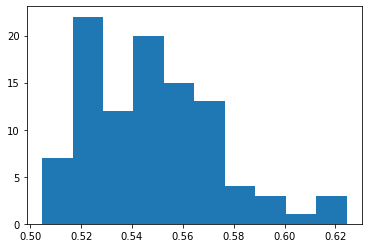

In [238]:
plt.hist(null_variance_explained)


In [230]:
fake_pca.explained_variance_ratio_

array([0.5727699, 0.4272301])

### Pokemon

In [243]:
poke = pd.read_csv('Pokemon.csv')
poke

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [244]:
feature_list = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
poke[feature_list].var()

HP          652.019323
Attack     1053.480599
Defense     972.410707
Sp. Atk    1070.748536
Sp. Def     774.448554
Speed       844.511133
dtype: float64

In [245]:
pca = PCA()

pca.fit(poke[feature_list])

PCA()

Text(0, 0.5, 'proportion of variance explained')

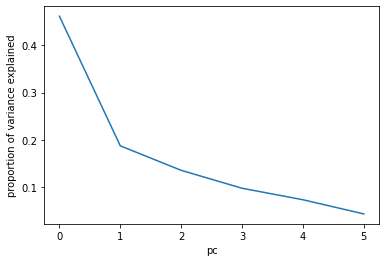

In [249]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('pc')
plt.ylabel('proportion of variance explained')

Text(0.5, 1.0, 'PC1')

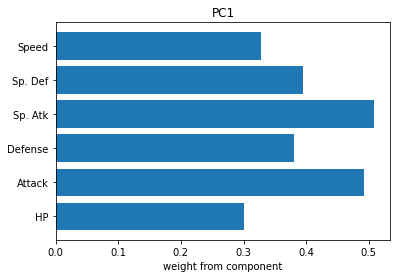

In [264]:
plt.barh(feature_list, pca.components_[0])
plt.xlabel('weight from component')
plt.title('PC1')

Text(0.5, 1.0, 'PC2')

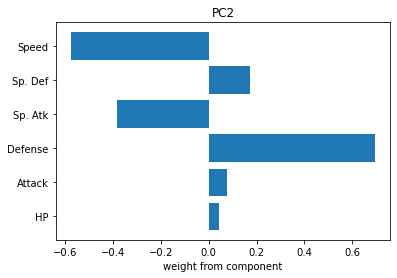

In [266]:
plt.barh(feature_list, pca.components_[1])
plt.xlabel('weight from component')
plt.title('PC2')

In [260]:
pca_location = pca.transform(poke[feature_list])

pca_locations = pd.DataFrame(pca_location, columns = ['PC'+str(i+1) for i in range(6)])


In [261]:
pca_locations['Name'] = poke['Name']

In [268]:
pca_locations.sort_values('PC2')

,PC1,PC2,PC3,PC4,PC5,PC6,Name
429,84.322438,-127.701649,-73.472445,-17.498508,-71.996191,4.981627,DeoxysAttack Forme
428,77.516397,-92.425348,-45.634349,-33.580787,-36.509562,0.936835,DeoxysNormal Forme
71,65.911935,-91.198082,61.691477,-37.151011,-14.781845,-26.634114,AlakazamMega Alakazam
678,20.161299,-80.449871,-2.495455,-11.233201,24.072202,-22.758139,Accelgor
164,148.702738,-75.089564,8.119111,10.104036,-22.393409,11.276635,MewtwoMega Mewtwo Y
...,...,...,...,...,...,...,...
414,55.085391,113.929872,-1.688324,-32.075284,12.602549,-30.189587,Regirock
223,28.384681,116.089376,-4.559049,-25.346544,-12.980966,-51.969747,Steelix
333,80.414429,130.115034,-36.038489,-48.132988,-13.705179,-38.350476,AggronMega Aggron
224,71.350484,145.224471,-16.307548,-36.483506,-10.247225,-31.099827,SteelixMega Steelix


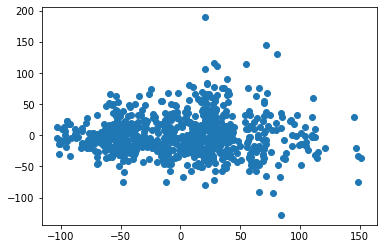

In [269]:
plt.scatter(pca_locations['PC1'], pca_locations['PC2'])


### measuring information retained

In [273]:
poke[feature_list]

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65
...,...,...,...,...,...,...
795,50,100,150,100,150,50
796,50,160,110,160,110,110
797,80,110,60,150,130,70
798,80,160,60,170,130,80


In [276]:
poke[feature_list] - pca.inverse_transform(pca_locations.iloc[:,0:6])

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,7.105427e-15,2.131628e-14,1.421085e-14,0.000000e+00,1.421085e-14,-1.421085e-14
1,0.000000e+00,1.421085e-14,7.105427e-15,0.000000e+00,0.000000e+00,-7.105427e-15
2,0.000000e+00,0.000000e+00,0.000000e+00,-1.421085e-14,-2.842171e-14,0.000000e+00
3,0.000000e+00,-2.842171e-14,0.000000e+00,0.000000e+00,-5.684342e-14,1.421085e-14
4,7.105427e-15,2.842171e-14,2.131628e-14,0.000000e+00,1.421085e-14,-1.421085e-14
...,...,...,...,...,...,...
795,0.000000e+00,-2.842171e-14,-5.684342e-14,0.000000e+00,-5.684342e-14,1.421085e-14
796,-7.105427e-15,-2.842171e-14,0.000000e+00,0.000000e+00,-5.684342e-14,0.000000e+00
797,0.000000e+00,0.000000e+00,0.000000e+00,-2.842171e-14,-5.684342e-14,-1.421085e-14
798,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.684342e-14,-1.421085e-14


In [277]:
((poke[feature_list] - 
  pca.inverse_transform(pca_locations.iloc[:,0:6]))**2).mean()

HP         8.317749e-29
Attack     5.270853e-28
Defense    3.742987e-28
Sp. Atk    2.951602e-28
Sp. Def    6.414386e-28
Speed      1.534177e-28
dtype: float64

In [289]:
pca = PCA(n_components = 3)
pca.fit(poke[feature_list])
pca_locs = pca.transform(poke[feature_list])

In [291]:
((poke[feature_list] - pca.inverse_transform(pca_locs))**2).mean()

HP         423.274736
Attack      57.386789
Defense    126.031222
Sp. Atk    173.698343
Sp. Def    145.773296
Speed      230.052976
dtype: float64

HP         0.655808
Attack     0.428875
Defense    0.630562
Sp. Atk    0.400865
Sp. Def    0.502480
Speed      0.685356
dtype: float64

In [58]:
((poke[feature_list] - pca.inverse_transform(pca_locs))**2).mean()

HP         427.599416
Attack     451.811568
Defense    613.165277
Sp. Atk    429.225167
Sp. Def    389.145139
Speed      578.790959
dtype: float64

In [61]:
((poke[feature_list] - pca.inverse_transform(pca_locs))**2).mean() / (poke[feature_list]**2).mean()

HP         0.078488
Attack     0.061948
Defense    0.095450
Sp. Atk    0.067359
Sp. Def    0.065475
Speed      0.105134
dtype: float64

In [292]:
poke[feature_list] - pca.inverse_transform(pca_locs)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-9.119912,6.839086,-4.428473,6.176022,1.885215,-8.644146
1,-4.429075,4.168882,-3.426460,2.608975,2.230727,-4.968264
2,1.117968,0.908379,-2.158378,-1.912643,2.799651,-0.284398
3,-12.434772,1.461909,4.235344,4.397741,-2.658498,0.665711
4,-13.951068,2.366337,3.324037,2.962938,-0.363078,1.222592
...,...,...,...,...,...,...
795,-41.210426,12.598765,-0.040888,-0.759527,13.950618,3.321606
796,-55.277801,16.811595,4.585066,21.067401,-1.531537,-10.763349
797,-8.785590,22.665176,-25.347983,13.800526,12.849101,-33.526239
798,-21.625431,32.514717,-31.918839,22.376432,15.861992,-45.884822


PCA: principal component analysis

we are learning new "directions" in the original feature space, and we can project our data points onto those directions.



## OSRI

In [5]:
osri = pd.read_csv('osri-data.csv', sep = '\t')

In [296]:
osri.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'IP', 'engnat', 'age',
       'education', 'gender', 'orientation', 'race', 'religion', 'hand',
       'fromgoogle'],
      dtype='object')

In [3]:
features = ['Q'+str(n) for n in range(1, 45)]
features

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28',
 'Q29',
 'Q30',
 'Q31',
 'Q32',
 'Q33',
 'Q34',
 'Q35',
 'Q36',
 'Q37',
 'Q38',
 'Q39',
 'Q40',
 'Q41',
 'Q42',
 'Q43',
 'Q44']

In [300]:
pca = PCA()
pca.fit(osri[features])

PCA()

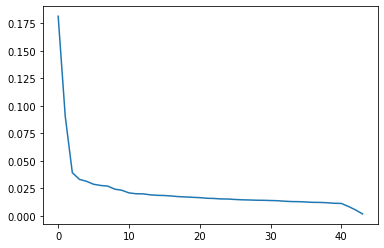

In [303]:
plt.plot(pca.explained_variance_ratio_)

<BarContainer object of 44 artists>

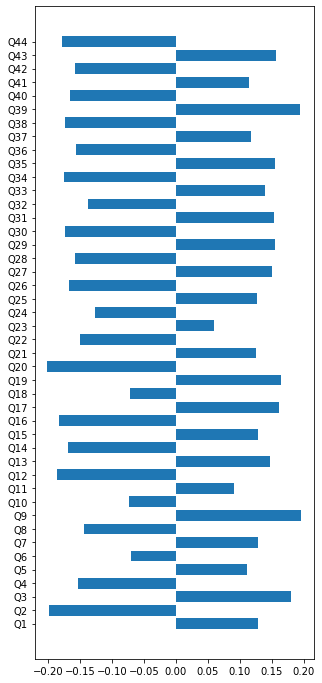

In [307]:
plt.figure(figsize = (5, 12))
plt.barh(features, pca.components_[0])


In [310]:
osri['gender'].unique()

array([1, 3, 2, 0])

In [313]:
pc1 = pca.transform(osri[features])[:,0]

Text(0.5, 0, 'PC1')

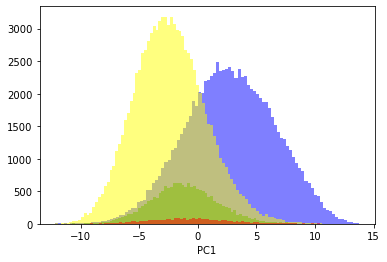

In [321]:
colors = {0:'red', 1:'blue', 2:'yellow', 3:'green'}
for gender in osri['gender'].unique():
    plt.hist(pc1[osri['gender']==gender], color=colors[gender], 
             alpha=0.5, bins=100)
plt.xlabel('PC1')


In [6]:
correlations = np.zeros((len(features), len(features)))
for f1 in features:
    for f2 in features:
        correlations[features.index(f1), 
                     features.index(f2)] = np.corrcoef(osri[f1], osri[f2])[0,1]

In [13]:
pd.DataFrame(correlations, columns = features, index=features)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44
Q1,1.000000,-0.161645,0.278410,-0.076150,0.186066,-0.093306,0.180873,-0.125498,0.242283,-0.089363,...,0.271204,-0.108039,0.157162,-0.084725,0.275752,-0.077076,0.163436,-0.082546,0.194208,-0.121676
Q2,-0.161645,1.000000,-0.074567,0.309118,-0.086993,0.185068,-0.168595,0.189091,-0.203329,0.216794,...,-0.133209,0.252911,-0.117865,0.261182,-0.116353,0.273236,-0.161826,0.271750,-0.083109,0.334426
Q3,0.278410,-0.074567,1.000000,0.026732,0.272146,-0.060483,0.235260,-0.125134,0.422585,-0.074090,...,0.362601,-0.073815,0.222452,-0.059105,0.491553,-0.072111,0.213359,-0.042263,0.287779,-0.052671
Q4,-0.076150,0.309118,0.026732,1.000000,0.042574,0.118803,-0.079375,0.205877,-0.132972,0.097375,...,0.025584,0.269113,-0.107292,0.384944,-0.033703,0.233955,-0.066130,0.317548,-0.054646,0.344356
Q5,0.186066,-0.086993,0.272146,0.042574,1.000000,0.030301,0.219949,-0.074628,0.216981,-0.052054,...,0.235292,-0.069635,0.149130,-0.002279,0.240851,-0.035301,0.183145,-0.044412,0.244249,-0.057310
Q6,-0.093306,0.185068,-0.060483,0.118803,0.030301,1.000000,-0.022880,0.090294,-0.102632,0.222758,...,-0.044206,0.055801,0.051511,0.066254,-0.072465,0.008488,-0.045722,0.131064,-0.025453,0.158738
Q7,0.180873,-0.168595,0.235260,-0.079375,0.219949,-0.022880,1.000000,-0.066451,0.300946,-0.045857,...,0.220871,-0.108772,0.185581,-0.097936,0.226894,-0.110578,0.137530,-0.088334,0.181716,-0.099949
Q8,-0.125498,0.189091,-0.125134,0.205877,-0.074628,0.090294,-0.066451,1.000000,-0.125939,0.106798,...,-0.126466,0.256291,-0.126134,0.263907,-0.140116,0.188246,-0.091728,0.183405,-0.128120,0.197477
Q9,0.242283,-0.203329,0.422585,-0.132972,0.216981,-0.102632,0.300946,-0.125939,1.000000,-0.060787,...,0.276336,-0.114042,0.227452,-0.151685,0.369958,-0.139811,0.175420,-0.132505,0.281845,-0.141642
Q10,-0.089363,0.216794,-0.074090,0.097375,-0.052054,0.222758,-0.045857,0.106798,-0.060787,1.000000,...,-0.066509,0.093148,0.042765,0.087594,-0.076806,0.043850,-0.102289,0.165808,-0.040694,0.165560


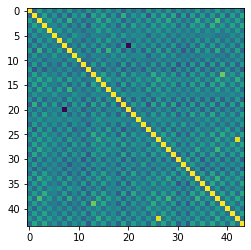

In [11]:
plt.imshow(correlations, )

In [12]:
?plt.imshow

In [158]:
pca = PCA()
pca.fit(osri[features])

PCA()

In [162]:
pca.explained_variance_ratio_

array([0.1815407 , 0.09046504, 0.03928597, 0.03320489, 0.03143698,
       0.02874585, 0.02764838, 0.02704499, 0.02429637, 0.0232631 ,
       0.02090774, 0.02010679, 0.02002159, 0.01913737, 0.01867677,
       0.0185117 , 0.01806433, 0.01749456, 0.01720762, 0.01686228,
       0.01656427, 0.01601664, 0.01582959, 0.01540427, 0.01530998,
       0.01490823, 0.01458603, 0.01445322, 0.01422906, 0.01415311,
       0.0139551 , 0.013788  , 0.0133191 , 0.01300916, 0.01290648,
       0.01264858, 0.01228066, 0.01223933, 0.01192496, 0.0114402 ,
       0.01129634, 0.00859971, 0.00544406, 0.00177091])

<BarContainer object of 44 artists>

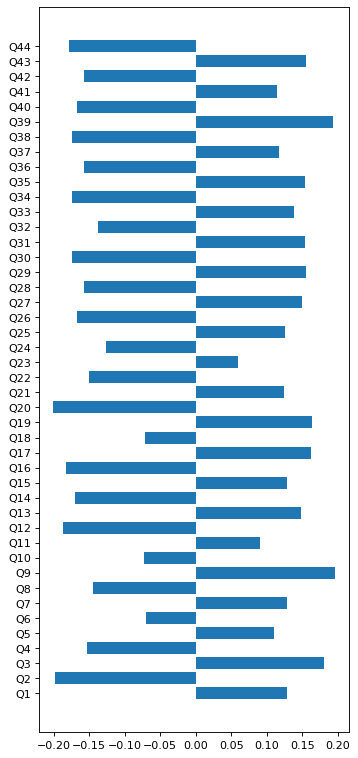

In [171]:
plt.figure(figsize=(5, 12), dpi=80)
plt.barh(features, pca.components_[0])
